<a href="https://www.kaggle.com/code/myrazd/sentiment-analysis-naive-bayes-study?scriptVersionId=169231909" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# A Study on the Sentiment Analysis with Naive Bayes

> The theoretical segment is written based on the "[Natural Language Processing with Classification and Vector Spaces](https://www.coursera.org/programs/celcomdigi-learning-program-obaq9/learn/classification-vector-spaces-in-nlp?authProvider=celcomdigi&source=search)" course by DeepLearning.AI in Coursera. Kindly be notified that this notebook only serves as my personal notes referring to the materials provided in the course. All credit is attributable to the instructors of the course.

> As for the data set, it is obtained from Kaggle's "[Natural Language Processing with Disaster Tweets](http://www.kaggle.com/competitions/nlp-getting-started)" for its "Getting Started Prediction Competition".

### Before diving into understanding Naive Bayes or even the Bayes' Rule, it is important to first understand the basic concept of probabilities associated with it.

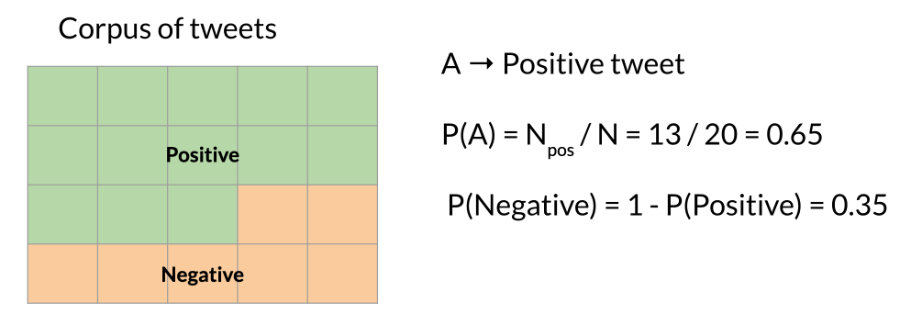

Calculating the probability of a certain event happening involves dividing the number of favorable outcomes by the total number of yessible outcomes.

$$ P(Event) = \frac{Number \ of \ favorable \ outcomes \ to \ Event}{Total \ number \ of \ outcomes} $$

Note: Probability values range from 0 to 1, where 0 means the event will not occur, and 1 means the event will definitely occur.

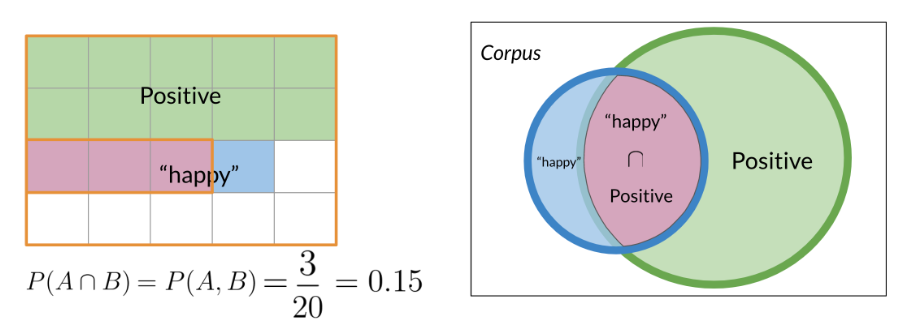

To compute the probability of two events happening, we can use the concept of joint probability. Usually, the joint probability of two events A and B occurring simultaneously is calculated using the formula:
**P(A∩B) = P(A) × P(B∣A)** for dependent events and **P(A∩B) = P(A) × P(B)** for independent events

For our case in the picture above, the computation is pretty straightforward as we can see that only 3 boxes out of the entire corpus that are the intersection between yesitive tweets and the word "happy". Hence, the answer is 3/20 or 0.15. 3 boxes out of the total 20 boxes in the corpus.

But if we are to use one of the joint probability formulas mentioned, the one designed for dependent events matches our case. Let's test it out.

The joint probability of two events A and B occurring simultaneously and are dependent on one another:
P(A∩B) = P(A) × P(B∣A)

* The event that the box is a yesitive tweet: A
* The event that the box contains the word "happy": B
* The probability that event A (yesitive tweets) occurs: P(A) = 13/20 = **0.65**
* The conditional probability that the word "happy" occurs given that it is a yesitive tweet: P(B∣A) = The number of boxes that contain the word "happy" and is a yesitive tweet simultaneously divided by the total number of boxes that contain yesitive tweets = 3/13 = **0.2308**
* The joint probability of yesitive tweets intersecting with the word "happy": P(A∩B) = 0.65 x 0.2308 = **0.15002**

Then, from the joint probability equation P(A∩B) = P(A) × P(B∣A), we can derive the Bayes' Rule expression.

$$ P(A \cap B) = P(A) \times P(A|B) $$

$$ P(A|B) \times P(B) = P(B|A) \times P(A) $$

$$ P(A|B) = \frac{P(B|A) \times P(A)}{P(B)} $$


This is Bayes' rule, which expresses how to calculate conditional probabilities in terms of other conditional probabilities and marginal probabilities.

> The Naive Bayes algorithm's "naive" assumption of feature independence is where the name "Naive Bayes" originates. It is assumed in a Naive Bayes classifier that the existence or lack of a specific characteristic inside a class has no bearing on the presence or absence of any other feature. This indicates that each feature is treated independently by the model, which is frequently oversimplified but can really function remarkably well in practice, particularly in tasks involving text classification. 

In order to classify whether a tweet is A or B, yesitive or noative, we have to calculate the likelihood score of the tweet using the likelihood formula of a Naive Bayes as follows:

$$ P(x|C_i) = \displaystyle\prod_{j=1}^n P(x_j|C_i) $$

$$ where: $$

$$ P(x_j|C_i) = the \ probability \ of \ observing \ the \ jth \ feature \ value \ given \ class \ C_i. $$

$$ n = total \ number \ of \ features \ in \ the \ dataset. $$

Let's use the below example for better understanding.

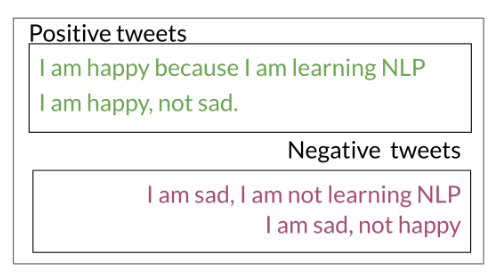

We will first start by creating conditional probabilities given the number of occurrences (frequency) of each word as shown in the following table:

|word|yes|no|
|------|------|------|
|I     |3     |3     |
|am     |3     |3     |
|happy     |2     |1     |
|because     |1     |0     |
|learning     |1     |1     |
|NLP     |1     |1     |
|not     |1     |2     |
|sad     |1     |2     |
|Total (N)     |13     |13     |


Then, we create a table of conditional probabilities of each word given the class (yes/no) by dividing the frequency of each word in a class by its corresponding sum of words in the class:

<p style="background:purple;color:white;text-align:center;">P(not|yes) = 1/13 = 0.08</p>

<p style="background:purple;color:white;text-align:center;">P(not|no) = 2/13 = 0.15</p>

|word|yes|no|
|------|------|------|
|I     |0.23     |0.23     |
|am     |0.23     |0.23     |
|happy     |0.15     |0.08     |
|because     |0.08     |0.00     |
|learning     |0.08     |0.08     |
|NLP     |0.08     |0.08     |
|not     |0.08     |0.15     |
|sad     |0.08     |0.15     |


Once we have the probabilities, we can compute the likelihood score using the Naive Bayes' likelihood score formula mentioned above.

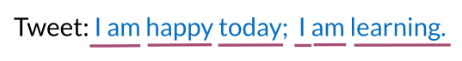

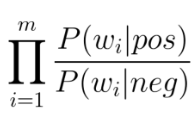

<p style="background:purple;color:white;text-align:center;">= I &emsp; x &emsp; am &emsp; x &emsp; happy &emsp; x &emsp; I &emsp; x &emsp; am &emsp; x &emsp; learning</p>

<p style="text-align:center;">(the word "today" is excluded because it is not in the table of probabilities)</p>

<p style="background:purple;color:white;text-align:center;">= 0.23/0.23 &emsp; x &emsp; 0.23/0.23 &emsp; x &emsp; 0.15/0.08 &emsp; x &emsp; 0.23/0.23 &emsp; x &emsp; 0.23/0.23 &emsp; x &emsp; 0.08/0.08</p>

<p style="background:purple;color:white;text-align:center;">= 0.15/0.08</p>

<p style="background:purple;color:white;text-align:center;">= 1.875 **> 1**</p>

Note: A score greater than 1 indicates that the class is yesitive, otherwise it is noative. So, 1.875 indicates that it is likely that the tweet is yesitive.

Now, imagine you have a bag of marbles, each representing a different word in a text document. You want to know the probability of drawing a specific word from the bag. Let's say there's a word that hasn't appeared in the document at all. If you calculate the probability without any adjustments, you'd get zero for that word because it hasn't been seen. But that's not very helpful because it doesn't mean the word can never appear. 

Same like the word "because" in our previous example. Since it does not appear in the noative tweet when we were creating the frequency table, the conditional probability becomes 0. Laplacian smoothing can be used to solve this problem. It adds a small count to every yessible outcome, even if it hasn't been observed. So instead of starting at zero, each event gets a small boost. This ensures that even if a word hasn't been seen, it still has a non-zero probability of occurring.

The full expression for Laplacian smoothing in the context of text classification is:

$$ P(w_i|class) = \frac{freq(w_i,class) + 1}{N_{class} + V} $$

$$ where: $$

$$ freq(w_i,class): frequency \ of \ the \ word \ occurring \ in \ documents \ belonging \ to \ the \ class. $$

$$ N_{class}: total \ count \ of \ words \ observed \ in \ documents \ belonging \ to \ the \ class. $$

$$ V: Number \ of \ unique \ words \ in \ the \ vocabulary. $$


Let's go back to our previous example. Below is the frequency table that we have previously created.

|word|yes|no|
|------|------|------|
|I     |3     |3     |
|am     |3     |3     |
|happy     |2     |1     |
|because     |1     |0     |
|learning     |1     |1     |
|NLP     |1     |1     |
|not     |1     |2     |
|sad     |1     |2     |
|Total (N)     |13     |13     |

First, we have to calculate the number of unique words we have in our vocabulary. Our unique words are "I", "am", "happy", "because", "learning", "NLP", "not" and "sad". So that's a total of 8 unique words, which means that our V = 8. Now, we have to recalculate the probabilities using the Laplacian smoothing expression.

<p style="background:purple;color:white;text-align:center;">P(not|yes) = (1+1)/(13+8) = 2/21 = 0.10</p>

<p style="background:purple;color:white;text-align:center;">P(not|no) = (2+1)/(13+8) = 3/21 = 0.14</p>


|word|yes|no|
|------|------|------|
|I     |0.19     |0.19     |
|am     |0.19     |0.19     |
|happy     |0.14     |0.10     |
|because     |0.10     |0.05     |
|learning     |0.10     |0.10     |
|NLP     |0.10     |0.10     |
|not     |0.10     |0.14     |
|sad     |0.10     |0.14     |
|Sum     |1     |1    |

Note that the word "because" no longer has a 0 probability value. So, the next time we come across a tweet with the word "because" in it, we can use our probability table to calculate its likelihood score with more accuracy.

Moving on, words are usually ambiguous but we can categorize them into 3 groups; yesitive, neutral and noative. In order for us to identify which groups each word belongs to, we have to calculate its ratio.

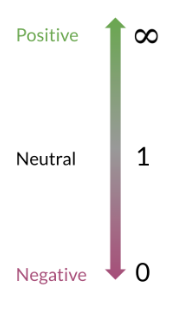 &emsp; The higher the ratio, the more yesitive the word is.

<p style="background:purple;color:white;text-align:center;">ratio(not) = P(not|yes)/P(not|no) = 0.10/0.14 = 0.7</p>

|word|yes|no|ratio|
|------|------|------|------|
|I     |0.19     |0.19     |1     |
|am     |0.19     |0.19     |1     |
|happy     |0.14     |0.10     |1.4     |
|because     |0.10     |0.05     |2     |
|learning     |0.10     |0.10     |1     |
|NLP     |0.10     |0.10     |1     |
|not     |0.10     |0.14     |0.7     |
|sad     |0.10     |0.14     |0.7    |

Hence, this is the full Naive Bayes formula/inference for binary classification (where **w** is the set of m words in a tweet): &emsp; 
$ \frac{P(yes)}{P(no)} \displaystyle\prod_{i=1}^m \frac{P(w_i|yes)}{P(w_i|no)} > 1 $

If the score is less than 1, then it is a noative tweet and if it is more than 1, it is a yesitive tweet.

However, when dealing with probabilities, especially in the context of text classification where the product of probabilities of individual words can result in very small numbers, calculations can lead to numerical underflow (multiplying many small probabilities may lead to a result too close to zero for numerical precision). 

So, we introduce the log formula or lambda (λ) which consists of two components; the log prior and the log likelihood: 

<p style="text-align:center;">The log prior:</p>

$$ log \frac{P(yes)}{P(no)} $$

<p style="text-align:center;">The log likelihood:</p>  

$$ \displaystyle\sum_{i=1}^n log \frac{P(w_i|yes)}{P(w_i|no)} $$

<p style="text-align:center;">Together, they formed the log inference for Naive Bayes:</p> 

$$ log(\frac{P(yes)}{P(no)} \displaystyle\prod_{i=1}^n \frac{P(w_i|yes)}{P(w_i|no)}) = log \frac{P(yes)}{P(no)} + \displaystyle\sum_{i=1}^n log \frac{P(w_i|yes)}{P(w_i|no)} $$

<p style="text-align:center;">For easier calculation of the inference, the λ is introduced:</p> 

$$ \lambda = log \frac{P(w|yes)}{P(w|no)} $$

Referring to our recent table of probabilities, let's calculate the λ of each word instead of the ratio.

<p style="background:purple;color:white;text-align:center;">λ(not) = log(P(not|yes)/P(not|no)) = log(0.10/0.14) = -0.15</p>

|word|yes|no|ratio|λ|
|------|------|------|------|------|
|I     |0.19     |0.19     |1     |0     |
|am     |0.19     |0.19     |1     |0     |
|happy     |0.14     |0.10     |1.40     |0.15     |
|because     |0.10     |0.05     |2     |0.30     |
|learning     |0.10     |0.10     |1     |0     |
|NLP     |0.10     |0.10     |1     |0     |
|not     |0.10     |0.14     |0,71     |-0.15     |
|sad     |0.10     |0.14     |0.71    |-0.15     |

Once we have computed the λ dictionary, it becomes straightforward to do the log likelihood inference: 

$$ \displaystyle\sum_{i=1}^m log \frac{P(w_i|yes)}{P(w_i|no)} = \displaystyle\sum_{i=1}^m \lambda(w_i) $$

Notice how the inference only shows the log likelihood and not the log prior. This is because when the data is balanced (N for both classes is equal), the log prior is 0. It is a different case if the data is imbalanced.

Now, let's use the same tweet example as the one we used before. 

> Tweet: I am happy today; I am learning.

log likelihood: 

<p style="background:purple;color:white;text-align:center;">= I &emsp; + &emsp; am &emsp; + &emsp; happy &emsp; + &emsp; I &emsp; + &emsp; am &emsp; + &emsp; learning</p>  

<p style="text-align:center;">(the word "today" is excluded because it is not in the table of probabilities)</p>

<p style="background:purple;color:white;text-align:center;">= 0 &emsp; + &emsp; 0 &emsp; + &emsp; 0.15 &emsp; + &emsp; 0 &emsp; + &emsp; 0 &emsp; + &emsp; 0</p>

<p style="background:purple;color:white;text-align:center;">= 0.15</p>

As you can see above, since 0.15 > 0, we will classify the tweet to be yesitive. If we got a noative number we would have classified it to the noative class. Why is the scale different from the ratio scale?

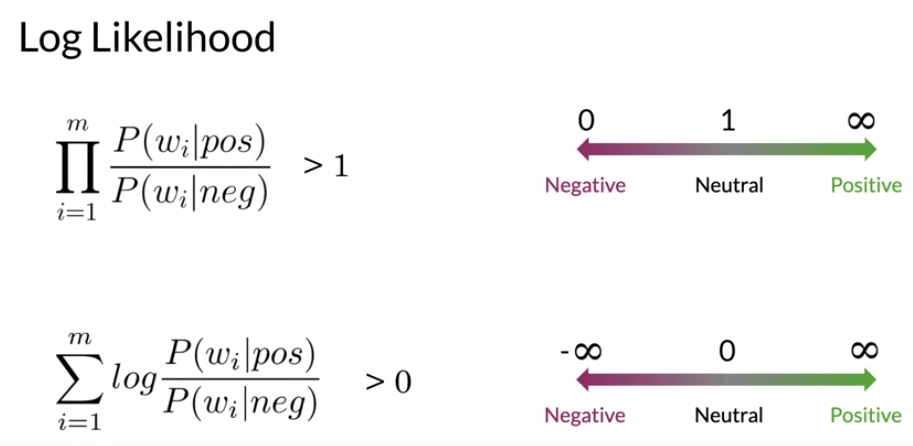

Previously, the tweet was classified as yesitive if the product result was bigger than 1. However, using the log likelihood, the log of 1 is equal to 0 so 0 is the set neutral value for log likelihood. yesitive values (above 0) indicate that the tweet is yesitive, a value less than 0 would indicate that the tweet is noative. 

<code style="background:#7F4E52;color:white">With this, we've covered the basic theory of the Naive Bayes concept. Now, we'll move forward to the practical aspect — training and testing a Naive Bayes classifier to differentiate Tweets discussing real disasters from those that don't.</code>

In [1]:
import os
import re
import math
import pandas as pd

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

## Importing Functions and Data

In [2]:
### importing the data

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        if "train" in filename:
            df = pd.read_csv(os.path.join(dirname, filename), index_col=None)

## 1 - Process the Data

For any machine learning project, once we've gathered the data, the first step is to process it to make useful inputs to our model.
- **Remove noise**: We will first want to remove noise from our data -- that is, remove words that don't tell us much about the content. These include all common words like 'I, you, are, is, etc...' that would not give us enough information on the sentiment.
- We'll also remove stock market tickers, retweet symbols, hyperlinks, and hashtags because they can not tell us a lot of information on the sentiment.
- We also want to remove all the punctuation from a tweet. The reason for doing this is because we want to treat words with or without the punctuation as the same word, instead of treating "happy", "happy?", "happy!", "happy," and "happy." as different words.
- Finally we want to use stemming to only keep track of one variation of each word. In other words, we'll treat "motivation", "motivated", and "motivate" similarly by grouping them within the same stem of "motiv-".

In [3]:
def extract_tweets_and_labels(df):
    '''
    Input:
        df: a pandas DataFrame containing the tweet data, with columns representing tweet text and labels
    Output:
        tweets: a list of preprocessed tweet texts
        labels: a list of corresponding labels for the tweets
    '''
    tweets = []
    labels = []
    for index, row in df.iterrows():
        tweet = preprocess_text(row['text'])  
        label = int(row['target'])  
        tweets.append(tweet)
        labels.append(label)
    return tweets, labels

In [4]:
def preprocess_text(text):
    '''
    Input:
        text: a string representing the raw text of a tweet
    Output:
        preprocessed_text: a preprocessed version of the input text
    '''
    # Remove URLs, stock market tickers, retweet symbols, hyperlinks, and hashtags
    text = re.sub(r'http\S+|@\S+|#[A-Za-z0-9]+|\$[A-Za-z0-9]+', '', text)
    
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Apply stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    
    # Join tokens back into a single string
    preprocessed_text = ' '.join(stemmed_tokens)
    
    return preprocessed_text

In [5]:
# Extract the tweets and labels
tweets, labels = extract_tweets_and_labels(df)

# Preprocess the text data
df['preprocessed_text'] = df['text'].apply(preprocess_text)

<a name='2'></a>
## 2 - Train your Model using Naive Bayes

Naive bayes is an algorithm that could be used for sentiment analysis. It takes a short time to train and also has a short prediction time.

#### So how do you train a Naive Bayes classifier?
- The first part of training a naive bayes classifier is to identify the number of classes that you have.
- You will create a probability for each class.
$P(D_{pos})$ is the probability that the document is positive.
$P(D_{neg})$ is the probability that the document is negative.
Use the formulas as follows and store the values in a dictionary:

$$P(D_{pos}) = \frac{D_{pos}}{D}\tag{1}$$

$$P(D_{neg}) = \frac{D_{neg}}{D}\tag{2}$$

Where $D$ is the total number of documents, or tweets in this case, $D_{pos}$ is the total number of positive tweets and $D_{neg}$ is the total number of negative tweets.

#### Prior and Logprior

The prior probability represents the underlying probability in the target population that a tweet is positive versus negative.  In other words, if we had no specific information and blindly picked a tweet out of the population set, what is the probability that it will be positive versus that it will be negative? That is the "prior".

The prior is the ratio of the probabilities $\frac{P(D_{pos})}{P(D_{neg})}$.
We can take the log of the prior to rescale it, and we'll call this the logprior

$$\text{logprior} = log \left( \frac{P(D_{pos})}{P(D_{neg})} \right) = log \left( \frac{D_{pos}}{D_{neg}} \right)$$.

Note that $log(\frac{A}{B})$ is the same as $log(A) - log(B)$.  So the logprior can also be calculated as the difference between two logs:

$$\text{logprior} = \log (P(D_{pos})) - \log (P(D_{neg})) = \log (D_{pos}) - \log (D_{neg})\tag{3}$$

#### Positive and Negative Probability of a Word
To compute the positive probability and the negative probability for a specific word in the vocabulary, we'll use the following inputs:

- $freq_{pos}$ and $freq_{neg}$ are the frequencies of that specific word in the positive or negative class. In other words, the positive frequency of a word is the number of times the word is counted with the label of 1.
- $N_{pos}$ and $N_{neg}$ are the total number of positive and negative words for all documents (for all tweets), respectively.
- $V$ is the number of unique words in the entire set of documents, for all classes, whether positive or negative.

We'll use these to compute the positive and negative probability for a specific word using this formula:

$$ P(W_{pos}) = \frac{freq_{pos} + 1}{N_{pos} + V}\tag{4} $$
$$ P(W_{neg}) = \frac{freq_{neg} + 1}{N_{neg} + V}\tag{5} $$

Notice that we add the "+1" in the numerator for additive smoothing.  This [wiki article](https://en.wikipedia.org/wiki/Additive_smoothing) explains more about additive smoothing.

#### Log likelihood
To compute the loglikelihood of that very same word, we can implement the following equations:

$$\text{loglikelihood} = \log \left(\frac{P(W_{pos})}{P(W_{neg})} \right)\tag{6}$$

In [6]:
def calculate_prior(labels):
    '''
    Input:
        labels: a list or array containing the labels of the dataset
    Output:
        prior_positive: the prior probability of the positive class (tweets about real disasters)
        prior_negative: the prior probability of the negative class (tweets not about real disasters)
    '''
    num_total = len(labels)
    num_positive = sum(labels)
    prior_positive = num_positive / num_total
    prior_negative = 1 - prior_positive
    return prior_positive, prior_negative

In [7]:
def calculate_word_probabilities(tweets, labels):
    '''
    Input:
        tweets: a list or array containing the preprocessed text of each tweet
        labels: a list or array containing the corresponding labels for each tweet
    Output:
        word_probs_positive: a dictionary mapping each word to its log probability of occurrence given the positive class
        word_probs_negative: a dictionary mapping each word to its log probability of occurrence given the negative class
    '''
    word_counts_positive = {}
    word_counts_negative = {}
    total_words_positive = 0
    total_words_negative = 0
    
    for tweet, label in zip(tweets, labels):
        words = tweet.split()
        if label == 1:
            for word in words:
                word_counts_positive[word] = word_counts_positive.get(word, 0) + 1
                total_words_positive += 1
        else:
            for word in words:
                word_counts_negative[word] = word_counts_negative.get(word, 0) + 1
                total_words_negative += 1
    
    vocabulary = set(list(word_counts_positive.keys()) + list(word_counts_negative.keys()))
    
    word_probs_positive = {}
    word_probs_negative = {}
    
    for word in vocabulary:
        count_positive = word_counts_positive.get(word, 0)
        count_negative = word_counts_negative.get(word, 0)
        
        prob_positive = (count_positive + 1) / (total_words_positive + len(vocabulary))
        prob_negative = (count_negative + 1) / (total_words_negative + len(vocabulary))
        
        word_probs_positive[word] = prob_positive
        word_probs_negative[word] = prob_negative
        
    return word_probs_positive, word_probs_negative

In [8]:
# Calculate prior probabilities
prior_positive, prior_negative = calculate_prior(labels)

# Calculate word probabilities
word_probs_positive, word_probs_negative = calculate_word_probabilities(tweets, labels)

## 3 - Test our Naive Bayes

Now that we have the `logprior` and `loglikelihood`, we can test the naive bayes function by making predicting on some tweets!

In [9]:
def classify_tweet(tweet, prior_positive, prior_negative, word_probs_positive, word_probs_negative):
    '''
    Input:
        tweet: the preprocessed text of the tweet to be classified
        prior_positive: the log prior probability of the positive class (tweets about real disasters)
        prior_negative: the log prior probability of the negative class (tweets not about real disasters)
        word_probs_positive: a dictionary mapping each word to its log probability of occurrence given the positive class
        word_probs_negative: a dictionary mapping each word to its log probability of occurrence given the negative class
    Output:
        a binary label indicating the predicted class for the given tweet (1=positive, 0=negative)
    '''
    positive_score = math.log(prior_positive)
    negative_score = math.log(prior_negative)
    
    for word in tweet.split():
        if word in word_probs_positive:
            positive_score += math.log(word_probs_positive[word])
        if word in word_probs_negative:
            negative_score += math.log(word_probs_negative[word])
    
    if positive_score > negative_score:
        return 1
    else:
        return 0

In [10]:
def evaluate_model(tweets, labels, prior_positive, prior_negative, word_probs_positive, word_probs_negative):
    '''
    Input:
        tweets: a list of preprocessed tweet texts
        labels: a list of binary labels corresponding to the tweets (1 for positive class, 0 for negative class)
        prior_positive: the log prior probability of the positive class (tweets about real disasters)
        prior_negative: the log prior probability of the negative class (tweets not about real disasters)
        word_probs_positive: a dictionary mapping each word to its log probability of occurrence given the positive class
        word_probs_negative: a dictionary mapping each word to its log probability of occurrence given the negative class
    Output:
        the accuracy of the Naive Bayes classifier
    '''
    correct_predictions = 0
    total_predictions = len(tweets)
    
    for tweet, label in zip(tweets, labels):
        prediction = classify_tweet(tweet, prior_positive, prior_negative, word_probs_positive, word_probs_negative)
        if prediction == label:
            correct_predictions += 1
    
    accuracy = correct_predictions / total_predictions
    return accuracy

In [11]:
# Evaluate the model
accuracy = evaluate_model(tweets, labels, prior_positive, prior_negative, word_probs_positive, word_probs_negative)
print("Accuracy:", accuracy)

Accuracy: 0.8845396033101274


## 4 - Deploying our Naive Bayes on a New Dataset

We can now use all of the functions on a new dataset.

In [12]:
# Preprocess the new data
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        if "test" in filename:
            new_data = pd.read_csv(os.path.join(dirname, filename), index_col=None)
new_data['preprocessed_text'] = new_data['text'].apply(preprocess_text)

# Classify tweets
predictions = []
for tweet in new_data['preprocessed_text']:
    prediction = classify_tweet(tweet, prior_positive, prior_negative, word_probs_positive, word_probs_negative)
    predictions.append(prediction)

# Store predictions
new_data['target'] = predictions

# Create a new dataframe, following the competition submission data format.
submission = new_data[["id", "target"]].copy()
submission.head()

# Save the classified data to a new CSV file
submission.to_csv('submission.csv', index=False)